# IRRIGATION CLOUD SYSTEM

# Introduction

### Problem Statement:
 The main problem in irrigation is that, being a human we may not know the exact environmetal conditions to grow a plant. With this we may take many wrong steps in cultivating a crop. In order to solve this problem we can take the help of machine learning to take the readings from mosture, temperature, and humidity sensors and make decisions accordingly.

# Importing the libraries

In [96]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.model_selection import KFold,cross_val_score

# Setting up directory

In [97]:
os.chdir('C:\\Users\\Ganesh\\Desktop')

# Importing data

In [98]:
feed=pd.read_csv("feed.csv")

#### dropping the column and row that has 'all' NAN values

In [99]:
feed=feed.dropna(axis=1 ,how='all')
feed=feed.dropna(axis=0 ,how='all')

## 1.Data Visualization

##### segmentation of data
##### storing different columns required for analysis in different data variables

In [100]:
w=feed['created_at'].values
x=feed['temperature'].values
y=feed['moisture level'].values
z=feed['pump action ON/OFF'].values
xy = feed[['temperature','moisture level']].values
x=x.reshape(-1,1)
y=y.reshape(-1,1)

## 1.1 Constraint Analysis
Analysing the suitable conditions for action of pump.

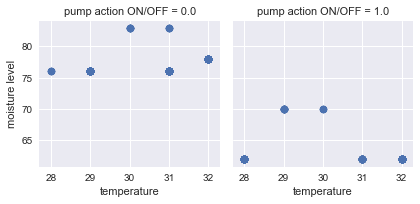

In [101]:
# Create scatter plots
sns.set()
g = sns.FacetGrid(feed, col="pump action ON/OFF", margin_titles=True)
g.map(plt.scatter, "temperature","moisture level")

# Show the plot
plt.show()

So the given constraints for "on" of pump is moisture<=70 and temperature doesn't play a role for the action of pump but it may affect the moisture content in soil which can be seen later in the analysis

## 1.2 Temperature variation during observation

maximum temparture occured in a day


created_at            2018-04-05 15:46:25 UTC
entry_id                                 2743
temperature                                32
humidity                                   41
moisture level                             62
pump action ON/OFF                          1
Name: 68, dtype: object

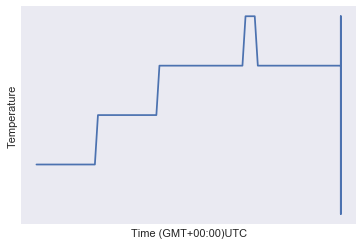

In [102]:
plt.plot(w,x)
cur = plt.gca()
cur.axes.get_xaxis().set_ticks([])
cur.axes.get_yaxis().set_ticks([])
plt.xlabel("Time (GMT+00:00)UTC")
plt.ylabel('Temperature')
print ("maximum temparture occured in a day")
feed.loc[feed['temperature'].idxmax()]

maximum temperature ocurs at the noon

## 2.Predicting the Dataset

## 2.1 Linear Regression

In [103]:
#linear regression between temperature and action
x_train,x_test,z_train,z_test=train_test_split(x,z,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(x_train, z_train)
z_pred = regressor.predict(x_test)
plt.scatter(x_train,z_train, color='red')
plt.plot(x_train,regressor.predict(x_train), color="blue")

ValueError: Expected 2D array, got 1D array instead:
array=[31. 31. 32. ... 31. 32. 32.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

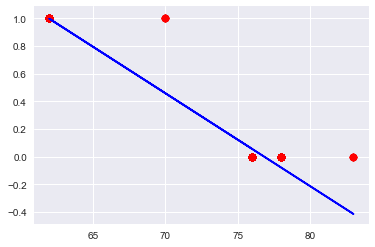

In [78]:
#linear Regression between moisture level and action
y_train,y_test,z_train,z_test=train_test_split(y,z,test_size=0.2,random_state=0)
regressor = LinearRegression()
regressor.fit(y_train, z_train)
z_pred = regressor.predict(y_test)
plt.scatter(y_train,z_train, color='red')
plt.plot(y_train,regressor.predict(y_train), color="blue")

# 2.2 Logistic Regression

In [79]:
xy_train, xy_test, z_train, z_test = train_test_split(xy, z, test_size = 0.25, random_state = 0)
classifier=LogisticRegression(random_state=0)
classifier.fit(xy_train,z_train)
z_pred=classifier.predict(xy_test)
cm=confusion_matrix(z_test,z_pred) 
cm

array([[228,   0],
       [  9, 128]], dtype=int64)

9 data items are predicted wrong by logistic regression

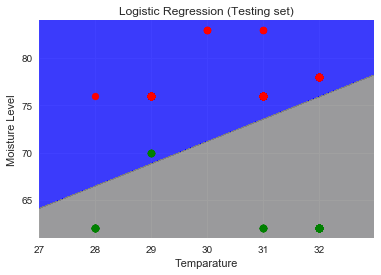

In [80]:
x_set, y_set = xy_test, z_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min()-1, stop = x_set[:, 0].max()+1, step = 0.01),
                     np.arange(start = x_set[:, 1].min()-1, stop = x_set[:, 1].max()+1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gray')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('Logistic Regression (Testing set)')
plt.xlabel('Temparature')
plt.ylabel('Moisture Level')
plt.show()

### Accuracy:

In [81]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
score = cross_val_score(classifier, xy, z, cv=k_fold, n_jobs=1, scoring='accuracy')
print (score)
round(np.mean(score)*100, 2)

[0.97260274 0.97260274 0.98630137 0.98630137 0.99315068 0.97945205
 1.         0.97945205 1.         0.99310345]


98.63

# 2.3 K-Nearest Neighbors
In pattern recognition, the k-nearest neighbors algorithm (k-NN) is a non-parametric method used for classification and regression.In both cases, the input consists of the k closest training examples in the feature space. The output depends on whether k-NN is used for classification or regression:

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In k-NN classification, the output is a class membership. An object is classified by a majority vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;In k-NN regression, the output is the property value for the object. This value is the average of the values of its k nearest neighbors.


In [82]:
classifier=KNeighborsClassifier(n_neighbors=5, metric='minkowski',p=1)#using manhattan distance
classifier.fit(xy_train, z_train)
z_pred=classifier.predict(xy_test)
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(z_test, z_pred)
cm

array([[228,   0],
       [  0, 137]], dtype=int64)

all data items are predicted correctly

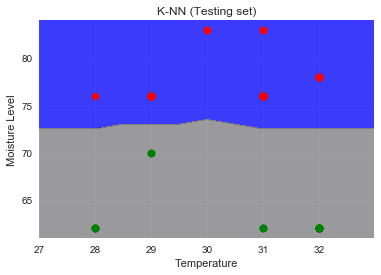

In [83]:
x_set, y_set = xy_test, z_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gray')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('K-NN (Testing set)')
plt.xlabel('Temperature')
plt.ylabel('Moisture Level')
plt.show()

### Accuracy:

In [84]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
score = cross_val_score(classifier, xy, z, cv=k_fold, n_jobs=1, scoring='accuracy')
print (score)
round(np.mean(score)*100, 2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


100.0

# 2.4 Support Vector Machine
In machine learning, support vector machines (SVMs, also support vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis.

In [85]:
classifier=SVC(kernel='linear', random_state=2)
classifier.fit(xy_train,z_train)
z_pred=classifier.predict(xy_test)
cm=confusion_matrix(z_test, z_pred)
cm

array([[228,   0],
       [  0, 137]], dtype=int64)

all data items are predicted correctly

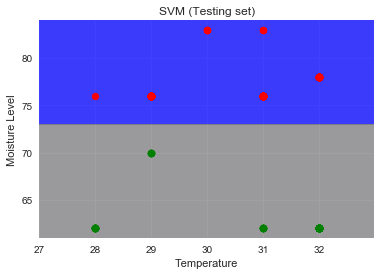

In [86]:
x_set, y_set = xy_test, z_test
x1, x2 = np.meshgrid(np.arange(start = x_set[:, 0].min() - 1, stop = x_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = x_set[:, 1].min() - 1, stop = x_set[:, 1].max() + 1, step = 0.01))
plt.contourf(x1, x2, classifier.predict(np.array([x1.ravel(), x2.ravel()]).T).reshape(x1.shape),
             alpha = 0.75, cmap = ListedColormap(('blue', 'gray')))
plt.xlim(x1.min(), x1.max())
plt.ylim(x2.min(), x2.max())
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(x_set[y_set == j, 0], x_set[y_set == j, 1],
                c = ListedColormap(('red', 'green'))(i), label = j)
plt.title('SVM (Testing set)')
plt.xlabel('Temperature')
plt.ylabel('Moisture Level')
plt.show()

### Accuracy:

In [87]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
score = cross_val_score(classifier, xy, z, cv=k_fold, n_jobs=1, scoring='accuracy')
print (score)
round(np.mean(score)*100, 2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


100.0

# 2.5 Decision Tree Regression
Decision tress often mimic the human level thinking so its so simple to understand the data and make some good interpretations.
Decision trees actually make you see the logic for the data to interpret(not like black box algorithms like SVM,NN,etc..)

In [88]:
from sklearn.tree import DecisionTreeRegressor
regressor=DecisionTreeRegressor(random_state=0)
regressor.fit(y,z)
z_pred=regressor.predict(6.5)

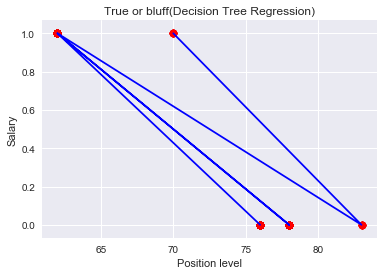

In [89]:
plt.scatter(y,z, color='red')
plt.plot(y, regressor.predict(y), color='blue')
plt.title('True or bluff(Decision Tree Regression)')
plt.xlabel('Moisture Level')
plt.ylabel('Pump Action')
plt.show()

### Accuracy:

In [94]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
score = cross_val_score(regressor, y, z, cv=k_fold, n_jobs=1, scoring='accuracy')
print (score)
round(np.mean(score)*100, 2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


100.0

# 2.6 Random Forest Regression
Random forest classifier creates a set of decision trees from randomly selected subset of training set. It then aggregates the votes from different decision trees to decide the final class of the test object.

In [92]:
from sklearn.ensemble import RandomForestRegressor
regressor=RandomForestRegressor(n_estimators=10, random_state=0)
regressor.fit(y,z)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
           oob_score=False, random_state=0, verbose=0, warm_start=False)

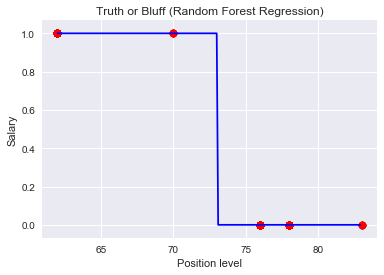

In [93]:
y_grid = np.arange(min(y), max(y), 0.1)
y_grid = y_grid.reshape((len(y_grid), 1))
plt.scatter(y, z, color = 'red')
plt.plot(y_grid, regressor.predict(y_grid), color = 'blue')
plt.title('Truth or Bluff (Random Forest Regression)')
plt.xlabel('Moisture Level')
plt.ylabel('Pump Action')
plt.show()

### Accuracy:

In [95]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
score = cross_val_score(regressor, y, z, cv=k_fold, n_jobs=1, scoring='accuracy')
print (score)
round(np.mean(score)*100, 2)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


100.0

# 3.Conclusion

#### Both KNN and SVM algorithms fits best to the given data as they predict the action of sprinklers with 100% accuracy